**Задание 1.** Представить текст сообщения в виде последовательности бит:
* преобразовать каждый символ сообщения в число, содержащее код этого символа в используемой в вашей среде кодировке;
* Преобразовать код символов вашего сообщения в двоичное представление.

In [2]:
# Задание 1

s = "Это встраиваемый секретный текст."
s_unicode = [ord(i) for i in s] # список чисел символов Unicode для скрываеваемого текста
print(s_unicode)
s_bin = list(format(num, 'b') for num in s_unicode) # список кодов символов, преобразованных в двоичное представление
print(s_bin)

[1069, 1090, 1086, 32, 1074, 1089, 1090, 1088, 1072, 1080, 1074, 1072, 1077, 1084, 1099, 1081, 32, 1089, 1077, 1082, 1088, 1077, 1090, 1085, 1099, 1081, 32, 1090, 1077, 1082, 1089, 1090, 46]
['10000101101', '10001000010', '10000111110', '100000', '10000110010', '10001000001', '10001000010', '10001000000', '10000110000', '10000111000', '10000110010', '10000110000', '10000110101', '10000111100', '10001001011', '10000111001', '100000', '10001000001', '10000110101', '10000111010', '10001000000', '10000110101', '10001000010', '10000111101', '10001001011', '10000111001', '100000', '10001000010', '10000110101', '10000111010', '10001000001', '10001000010', '101110']


**Задание 2.** Реализовать простейшую операцию стеганографического встраивания текста в текст:
* прочитать содержимое текстовых файлов -- будущего контейнера скрытого сообщения и самого скрытого сообщения;
* модифицировать число пробелов текста-контейнера в соответствии с побитовым представлением встраиваемого текста: если первый бит встраиваемого текста -- 0, между первыми двумя словами текста контейнера сделать один пробел, если 1 -- то два и так далее, пока не будет записано все сообщение или не кончится контейнер;
* в качестве окончания сообщения используйте символ или набор символов, которые заведомо не встретятся в вашем скрываемом тексте;
* записать результат в текстовый файл.

In [3]:
def ReadingFile (path): # функция чтения файла
  #txt = []
  txt = ''
  f = None
  try:
      f = open(path, 'r', encoding="utf-8")  #Открыть файл для чтения
      for ln in f: #Обход строк файла и добавление в список
          #txt.extend(ln) # Добавить к списку
          txt += ln.replace('\n', ' ') # символ окончания строки заменяем на пробел
  except Exception as e:
      print("Ошибка при работе с файлом:", e)
  finally:
      if f:  # Если файл не открылся, значит 'f' == None и закрывать его не нужно
          f.close()
  return txt

In [4]:
def WritingFile (path, w_txt): # функция записи в файл
  f = None
  try:
      f = open(path, 'w', encoding="utf-8") #Открыть файл для записи
      f.write(w_txt) # метод write() - запись в 
      print("Текст успешно записан в файл")
  except Exception as e:
      print("Ошибка при работе с файлом:", e)
  finally:
      if f:  # Если файл не открылся, значит 'fh' == None и закрывать его не нужно
          f.close()

In [5]:
container_txt = ReadingFile('container.txt')
print('Прочитанный текст контейнер:', container_txt)

Прочитанный текст контейнер: Чаще всего искусственным интеллектом, или ИИ (Artificial Intelligence – AI), называют процесс создания машин, которые способны действовать таким образом, что будут восприниматься человеком как разумные. Это может быть повторение поведения человека или выполнение более простых задач, например, выживание в динамически меняющейся обстановке (поведение насекомых, животных и т.п.). В период становления ИИ создание разумных систем казалось очень простой задачей, которая так и не была решена. В наше время цели создания ИИ стали намного практичнее. Соответственно искусственный интеллект в настоящее время толкуется, как свойство автоматических систем брать на себя отдельные функции интеллекта человека, например, выбирать и принимать оптимальные решения на основе ранее полученного опыта и рационального анализа внешних воздействий. Как правило, интеллектом называется способность мозга решать (интеллектуальные) задачи путем приобретения, запоминания и целенаправленного

In [6]:
secret_txt = ReadingFile('secret_txt.txt')
print('Прочитанный секретный текст:', secret_txt)

Прочитанный секретный текст: Это встраиваемый секретный текст.


In [7]:
# Функция стеганографического встраивания текста в текст (первый способ)
def Steganographic_Write_1 (container_txt, secret_txt):
  bin_txt = list(format(ord(x), 'b') for x in secret_txt) # представляем встраиваемое сообщение как последованность бит
  result = ''
  i = 0
  j = 0
  for q, ch in enumerate(container_txt):
    result += ch
    if (ch == ' '): # если в тексте-контейнере встретился пробел
      if (i < len(bin_txt)): # обходим список встраиваемого текста по каждому биту
        if (j < len(bin_txt[i])):
          if (bin_txt[i][j] == '1'):
            result += ' ' + ' ' # добавляем пробелы после текущего слова в тексте-контейнере
          if (bin_txt[i][j] == '0'):
            result += ' '
          j += 1
        elif (i+1 < len(bin_txt)): # переходим к следующей букве - ее двоичному представлению
          j = 0 # оставляем пробел как есть, чтобы при обратной операции чтения различать двоичное представление букв друг от друга
          i += 1
        elif (i == len(bin_txt)-1): # если весь текст уже был встроен, то используем символ окончания
          result = result[:-1] # удаляем пробел
          result += ';' + ' ' # добавляем символ окончания встраиваемого текста и добавляем пробел после него
          result += container_txt[q+1:] # добавляем остаток текста
          break
  return result
result_txt = Steganographic_Write_1(container_txt, secret_txt)
print("Результат встраивания:", result_txt)
WritingFile('result_txt.txt', result_txt) # запись в файл

Результат встраивания: Чаще   всего  искусственным  интеллектом,  или  ИИ   (Artificial  Intelligence   –   AI),  называют   процесс создания   машин,  которые  способны  действовать   таким  образом,  что  будут  восприниматься   человеком  как разумные.   Это  может  быть  повторение  поведения   человека   или   выполнение   более   простых  задач, например,   выживание  в  динамически  меняющейся  обстановке  (поведение насекомых,   животных  и  т.п.).  В  период   становления   ИИ  создание  разумных   систем  казалось очень   простой  задачей,  которая  так   и  не  была  решена.  В  наше   время цели   создания  ИИ  стали  намного   практичнее.  Соответственно  искусственный  интеллект  в   настоящее  время толкуется,   как  свойство  автоматических  систем   брать  на  себя  отдельные  функции  интеллекта  человека, например,   выбирать  и  принимать  оптимальные  решения   на   основе  ранее  полученного  опыта  и рационального   анализа  внешних  воздействий.  Как  правило,  

**Задание 3.** Реализовать обратную операция чтения встроенного сообщения из текстового файла-контейнера.

In [8]:
# Задание 3
container = ReadingFile('result_txt.txt')
print('Прочитанный текст:', container)

Прочитанный текст: Чаще   всего  искусственным  интеллектом,  или  ИИ   (Artificial  Intelligence   –   AI),  называют   процесс создания   машин,  которые  способны  действовать   таким  образом,  что  будут  восприниматься   человеком  как разумные.   Это  может  быть  повторение  поведения   человека   или   выполнение   более   простых  задач, например,   выживание  в  динамически  меняющейся  обстановке  (поведение насекомых,   животных  и  т.п.).  В  период   становления   ИИ  создание  разумных   систем  казалось очень   простой  задачей,  которая  так   и  не  была  решена.  В  наше   время цели   создания  ИИ  стали  намного   практичнее.  Соответственно  искусственный  интеллект  в   настоящее  время толкуется,   как  свойство  автоматических  систем   брать  на  себя  отдельные  функции  интеллекта  человека, например,   выбирать  и  принимать  оптимальные  решения   на   основе  ранее  полученного  опыта  и рационального   анализа  внешних  воздействий.  Как  правило,   инт

In [9]:
# Функция чтения скрытого текста (для первого способа)
def Steganographic_Read_1 (container):
  input_bin = ""
  input_txt = ""
  for q, ch in enumerate(container):
    if (ch == " "):
      if (container[q-1] != " " and container[q+1] == " " and container[q+2] == " "):
        input_bin += "1"
      if (container[q-1] != " " and container[q+1] == " " and container[q+2] != " "):
        input_bin += "0"
      if (container[q-1] != " " and container[q+1] != " "):
        input_txt += chr(int(input_bin, 2))
        #print(input_bin)
        input_bin = ""
      if (container[q-1] == ";" and container[q+1] != " "):
        break
  return input_txt
input_txt = Steganographic_Read_1(container)
print("Прочитанное встроенное сообщение:", input_txt)

Прочитанное встроенное сообщение: Это встраиваемый секретный текст.


**Задание 4.** Рассчитать энтропию содержимого строки текста по формуле
  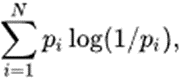
где pi -- вероятность появления данной буквы в строке, N -- длина строки, а 
pi = ki/ N, где ki -- число появлений данного символа в строке.
Можно воспользоваться встроенными функциями расчета энтропии в вашей среде.


In [15]:
# Задание 4
from math import log2
from collections import Counter

# Функция расчета энтропии
def entropy (txt):
    dic = Counter(txt) # словарь с числом появлений каждого символа текста
    total = sum(dic.values()) # длину строки можно рассчитать как сумму всех частот символов
    return round(sum(val / total * log2(total / val) for val in dic.values()), 5)

entropy(container_txt)

4.63262

**Задание 5.** Оценить ограничения встраивания для трех разных файлов контейнеров:
* Какого максимального размера (кол-во символов) скрытый текст поместится в ваш контейнер;
* Выведите общее соотношение доли максимально длинного скрытого сообщения, помещающегося в данный контейнер при использовании данного подхода встраивания, по отношению к размеру контейнера;
* заполнить таблицу:

In [17]:
# Задание 5
import string
letters_and_digits = string.ascii_letters + string.digits + string.punctuation + " " # исходная строка из строчных, прописных букв латинского алфавита, цифр и доп. знаков
bin_txt = list(format(ord(x), 'b') for x in letters_and_digits)
print(bin_txt)
len_lst = []
for bin in bin_txt:
  len_lst.append(len(bin))
print(len_lst)
i_lst = []
for i,l in enumerate(len_lst):
  if l == min(len_lst):
    print("Символы с минимальной длиной в битовом представлении:",chr(int(bin_txt[i], 2)))
  else:
    print("Остальные символы:",chr(int(bin_txt[i], 2)))
# Таким образом можно заметить, что все буквы латинского алфавита (строчные и прописные) занимают 7 бит, а числа и доп знаки 6 бит

['1100001', '1100010', '1100011', '1100100', '1100101', '1100110', '1100111', '1101000', '1101001', '1101010', '1101011', '1101100', '1101101', '1101110', '1101111', '1110000', '1110001', '1110010', '1110011', '1110100', '1110101', '1110110', '1110111', '1111000', '1111001', '1111010', '1000001', '1000010', '1000011', '1000100', '1000101', '1000110', '1000111', '1001000', '1001001', '1001010', '1001011', '1001100', '1001101', '1001110', '1001111', '1010000', '1010001', '1010010', '1010011', '1010100', '1010101', '1010110', '1010111', '1011000', '1011001', '1011010', '110000', '110001', '110010', '110011', '110100', '110101', '110110', '110111', '111000', '111001', '100001', '100010', '100011', '100100', '100101', '100110', '100111', '101000', '101001', '101010', '101011', '101100', '101101', '101110', '101111', '111010', '111011', '111100', '111101', '111110', '111111', '1000000', '1011011', '1011100', '1011101', '1011110', '1011111', '1100000', '1111011', '1111100', '1111101', '111111

In [18]:
# подсчитываем максимально возможную длину скрытого текста (для первого способа)
test_container = ReadingFile('test_container_1.txt')
print('Прочитанный текст-контейнер:', test_container)
print('Длина контейнера:', len(test_container))
count = test_container.count(' ') # подсчет пробелов в тексте-контейнере
max_len = count // 7 # если предположить, что встраиваемый текст состоит только из строчных и прописных букв латинского алфавита без пробелов
print("Максимальная длина встраиваемого текста:", max_len)
print("Соотношение длины встраиваемого текста к длине контейнера", round(max_len/len(test_container),5))
print("Энтропия:", entropy(test_container))

Прочитанный текст-контейнер: A man appeared on the corner the cat had been watching, appeared so suddenly and silently you’d have thought he’d just popped out of the ground. The cat’s tail twitched and its eyes narrowed. Nothing like this man had ever been seen in Privet Drive. He was tall, thin and very old, judging by the silver of his hair and beard, which were both long enough to tuck into his belt. He was wearing long robes, a purple cloak which swept the ground and high-heeled, buckled boots. His blue eyes were light, bright and sparkling behind half-moon spectacles and his nose was very long and crooked, as though it had been broken at least twice. This man’s name was Albus Dumbledore. Albus Dumbledore didn’t seem to realise that he had just arrived in a street where everything from his name to his boots was unwelcome. He was busy rummaging in his cloak, looking for something. But he did seem to realise he was being watched, because he looked up suddenly at the cat, which was st

In [19]:
test_container = ReadingFile('test_container_2.txt')
print('Прочитанный текст-контейнер:', test_container)
print('Длина контейнера:', len(test_container))
count = test_container.count(' ') # подсчет пробелов в тексте-контейнере
max_len = count // 7 # если предположить, что встраиваемый текст состоит только из строчных и прописных букв латинского алфавита без пробелов
print("Максимальная длина встраиваемого текста:", max_len)
print("Соотношение длины встраиваемого текста к длине контейнера", round(max_len/len(test_container),5))
print("Энтропия:", entropy(test_container))

Прочитанный текст-контейнер: Black holes are areas in the universe where gravity pulls in everything, even light. Nothing can get out and all objects are squeezed into a tiny space. Because there is no light in black holes we cannot see them. But scientists can detect the immense gravity and radiation around them. They are the most mysterious objects in astronomy. Scientists think that the first black holes were formed when the universe began about 13 billion of years ago. Albert Einstein was the first scientist to predict that black holes existed. But it was in 1971 that the first black hole was actually discovered. Black holes can have various sizes, some may be even as small as an atom. But they all have one thing in common – a very large mass. A stellar occurs when very large stars burn away the rest of the fuel that they have and collapse. It is so massive that several of our suns could fit in it. Our sun, however, could never become a stellar because it is too small. Supermassive

In [20]:
test_container = ReadingFile('test_container_3.txt')
print('Прочитанный текст-контейнер:', test_container)
print('Длина контейнера:', len(test_container))
count = test_container.count(' ') # подсчет пробелов в тексте-контейнере
max_len = count // 7 # если предположить, что встраиваемый текст состоит только из строчных и прописных букв латинского алфавита без пробелов
print("Максимальная длина встраиваемого текста:", max_len)
print("Соотношение длины встраиваемого текста к длине контейнера", round(max_len/len(test_container),5))
print("Энтропия:", entropy(test_container))

Прочитанный текст-контейнер: Data Processing, in computer science, the analysis and organization of data by the repeated use of one or more computer programs. Data processing is used extensively in business, engineering, and science and to an increasing extent in nearly all areas in which computers are used. Businesses use data processing for such tasks as payroll preparation, accounting, record keeping, inventory control, sales analysis, and the processing of bank and credit card account statements. Engineers and scientists use data processing for a wide variety of applications, including the processing of seismic data for oil and mineral exploration, the analysis of new product designs, the processing of satellite imagery, and the analysis of data from scientific experiments.  Data processing is divided into two kinds of processing: database processing and transaction processing. A database is a collection of common records that can be searched, accessed, and modified, such as bank a

In [21]:
# подсчитываем максимально возможную длину скрытого текста (для второго способа)
test_container = ReadingFile('test_container_1.txt')
print('Прочитанный текст-контейнер:', test_container)
print('Длина контейнера:', len(test_container))
count = test_container.count(' ') # подсчет пробелов в тексте-контейнере
max_len = count // 5 // 7 # так как каждый бит встраивается в один из 5ти пробелов контейнера
print("Максимальная длина встраиваемого текста:", max_len)
print("Соотношение длины встраиваемого текста к длине контейнера", round(max_len/len(test_container),5))
print("Энтропия:", entropy(test_container))

Прочитанный текст-контейнер: A man appeared on the corner the cat had been watching, appeared so suddenly and silently you’d have thought he’d just popped out of the ground. The cat’s tail twitched and its eyes narrowed. Nothing like this man had ever been seen in Privet Drive. He was tall, thin and very old, judging by the silver of his hair and beard, which were both long enough to tuck into his belt. He was wearing long robes, a purple cloak which swept the ground and high-heeled, buckled boots. His blue eyes were light, bright and sparkling behind half-moon spectacles and his nose was very long and crooked, as though it had been broken at least twice. This man’s name was Albus Dumbledore. Albus Dumbledore didn’t seem to realise that he had just arrived in a street where everything from his name to his boots was unwelcome. He was busy rummaging in his cloak, looking for something. But he did seem to realise he was being watched, because he looked up suddenly at the cat, which was st

In [22]:
test_container = ReadingFile('test_container_2.txt')
print('Прочитанный текст-контейнер:', test_container)
print('Длина контейнера:', len(test_container))
count = test_container.count(' ') # подсчет пробелов в тексте-контейнере
max_len = count // 5 // 7
print("Максимальная длина встраиваемого текста:", max_len)
print("Соотношение длины встраиваемого текста к длине контейнера", round(max_len/len(test_container),5))
print("Энтропия:", entropy(test_container))

Прочитанный текст-контейнер: Black holes are areas in the universe where gravity pulls in everything, even light. Nothing can get out and all objects are squeezed into a tiny space. Because there is no light in black holes we cannot see them. But scientists can detect the immense gravity and radiation around them. They are the most mysterious objects in astronomy. Scientists think that the first black holes were formed when the universe began about 13 billion of years ago. Albert Einstein was the first scientist to predict that black holes existed. But it was in 1971 that the first black hole was actually discovered. Black holes can have various sizes, some may be even as small as an atom. But they all have one thing in common – a very large mass. A stellar occurs when very large stars burn away the rest of the fuel that they have and collapse. It is so massive that several of our suns could fit in it. Our sun, however, could never become a stellar because it is too small. Supermassive

In [23]:
test_container = ReadingFile('test_container_3.txt')
print('Прочитанный текст-контейнер:', test_container)
print('Длина контейнера:', len(test_container))
count = test_container.count(' ') # подсчет пробелов в тексте-контейнере
max_len = count // 5 // 7
print("Максимальная длина встраиваемого текста:", max_len)
print("Соотношение длины встраиваемого текста к длине контейнера", round(max_len/len(test_container),5))
print("Энтропия:", entropy(test_container))

Прочитанный текст-контейнер: Data Processing, in computer science, the analysis and organization of data by the repeated use of one or more computer programs. Data processing is used extensively in business, engineering, and science and to an increasing extent in nearly all areas in which computers are used. Businesses use data processing for such tasks as payroll preparation, accounting, record keeping, inventory control, sales analysis, and the processing of bank and credit card account statements. Engineers and scientists use data processing for a wide variety of applications, including the processing of seismic data for oil and mineral exploration, the analysis of new product designs, the processing of satellite imagery, and the analysis of data from scientific experiments.  Data processing is divided into two kinds of processing: database processing and transaction processing. A database is a collection of common records that can be searched, accessed, and modified, such as bank a

*Таблица для первого способа*

| Имя файла контейнера | Размер контейнера (число символов) | Максимальный размер встраиваемого сообщения (число символов) | Энтропия |
|:--------------------:|:----------------------------------:|:------------------------------------------------------------:|:--------:|
| test_container_1.txt |                2307                |                              60                              |  4.32214 |
| test_container_2.txt |                1812                |                              47                              |  4.26998 |
| test_container_3.txt |                3940                |                              87                              |  4.19374 |

*Таблица для второго способа*

| Имя файла контейнера | Размер контейнера (число символов) | Максимальный размер встраиваемого сообщения (число символов) | Энтропия |
|:--------------------:|:----------------------------------:|:------------------------------------------------------------:|:--------:|
| test_container_1.txt |                2307                |                              12                              |  4.32214 |
| test_container_2.txt |                1812                |                               9                              |  4.26998 |
| test_container_3.txt |                3940                |                              17                              |  4.19374 |

**Задание 6.** Провести эксперименты с тремя различными файлами-контейнерами и тремя разными скрытыми сообщениями и заполнить таблицу (для каждого файла-контейнера при этом проводится по три эксперимента с каждым из трех встраиваемых сообщений):

In [31]:
# Задание 6
test_container = ReadingFile('test_container_1.txt')
print('Прочитанный текст-контейнер:', test_container)
secret_txt = ReadingFile('secret_txt_1.txt')
print('Прочитанный секретный текст:', secret_txt)
print('Длина скрытого сообщения:', len(secret_txt))
result_txt = Steganographic_Write_1(test_container, secret_txt)
print('Длина контейнера после встраивания', len(result_txt))
print("Энтропия до встраивания:", entropy(test_container))
print("Энтропия после встраивания:", entropy(result_txt))

Прочитанный текст-контейнер: A man appeared on the corner the cat had been watching, appeared so suddenly and silently you’d have thought he’d just popped out of the ground. The cat’s tail twitched and its eyes narrowed. Nothing like this man had ever been seen in Privet Drive. He was tall, thin and very old, judging by the silver of his hair and beard, which were both long enough to tuck into his belt. He was wearing long robes, a purple cloak which swept the ground and high-heeled, buckled boots. His blue eyes were light, bright and sparkling behind half-moon spectacles and his nose was very long and crooked, as though it had been broken at least twice. This man’s name was Albus Dumbledore. Albus Dumbledore didn’t seem to realise that he had just arrived in a street where everything from his name to his boots was unwelcome. He was busy rummaging in his cloak, looking for something. But he did seem to realise he was being watched, because he looked up suddenly at the cat, which was st

In [33]:
test_container = ReadingFile('test_container_1.txt')
print('Прочитанный текст-контейнер:', test_container)
secret_txt = ReadingFile('secret_txt_2.txt')
print('Прочитанный секретный текст:', secret_txt)
print('Длина скрытого сообщения:', len(secret_txt))
result_txt = Steganographic_Write_1(test_container, secret_txt)
print('Длина контейнера после встраивания', len(result_txt))
print("Энтропия до встраивания:", entropy(test_container))
print("Энтропия после встраивания:", entropy(result_txt))

Прочитанный текст-контейнер: A man appeared on the corner the cat had been watching, appeared so suddenly and silently you’d have thought he’d just popped out of the ground. The cat’s tail twitched and its eyes narrowed. Nothing like this man had ever been seen in Privet Drive. He was tall, thin and very old, judging by the silver of his hair and beard, which were both long enough to tuck into his belt. He was wearing long robes, a purple cloak which swept the ground and high-heeled, buckled boots. His blue eyes were light, bright and sparkling behind half-moon spectacles and his nose was very long and crooked, as though it had been broken at least twice. This man’s name was Albus Dumbledore. Albus Dumbledore didn’t seem to realise that he had just arrived in a street where everything from his name to his boots was unwelcome. He was busy rummaging in his cloak, looking for something. But he did seem to realise he was being watched, because he looked up suddenly at the cat, which was st

In [28]:
test_container = ReadingFile('test_container_1.txt')
print('Прочитанный текст-контейнер:', test_container)
secret_txt = ReadingFile('secret_txt_3.txt')
print('Прочитанный секретный текст:', secret_txt)
print('Длина скрытого сообщения:', len(secret_txt))
result_txt = Steganographic_Write_1(test_container, secret_txt)
print('Длина контейнера после встраивания', len(result_txt))
print("Энтропия до встраивания:", entropy(test_container))
print("Энтропия после встраивания:", entropy(result_txt))

Прочитанный текст-контейнер: A man appeared on the corner the cat had been watching, appeared so suddenly and silently you’d have thought he’d just popped out of the ground. The cat’s tail twitched and its eyes narrowed. Nothing like this man had ever been seen in Privet Drive. He was tall, thin and very old, judging by the silver of his hair and beard, which were both long enough to tuck into his belt. He was wearing long robes, a purple cloak which swept the ground and high-heeled, buckled boots. His blue eyes were light, bright and sparkling behind half-moon spectacles and his nose was very long and crooked, as though it had been broken at least twice. This man’s name was Albus Dumbledore. Albus Dumbledore didn’t seem to realise that he had just arrived in a street where everything from his name to his boots was unwelcome. He was busy rummaging in his cloak, looking for something. But he did seem to realise he was being watched, because he looked up suddenly at the cat, which was st

| Имя файла контейнера | Имя файла  встраиваемого сообщения | Размер контейнера | Размер скрытого сообщения | Размер контейнера после встраивания | Энтропия до встраивания | Энтропия после встраивания |
|:--------------------:|:----------------------------------:|:-----------------:|:-------------------------:|:-----------------------------------:|:-----------------------:|:--------------------------:|
| test_container_1.txt |          secret_txt_1.txt          |        2307       |             24            |                 2569                |         4.32214         |           4.10491          |
| test_container_1.txt |          secret_txt_2.txt          |        2307       |             56            |                 2879                |         4.32214         |           3.8427           |
| test_container_1.txt |          secret_txt_3.txt          |        2307       |             38            |                 2709                |         4.32214         |           3.98627          |
| test_container_2.txt |          secret_txt_1.txt          |        1812       |             24            |                 2074                |         4.26998         |           4.00026          |
| test_container_2.txt |          secret_txt_2.txt          |        1812       |             56            |                 2256                |         4.26998         |           3.80741          |
| test_container_2.txt |          secret_txt_3.txt          |        1812       |             38            |                 2214                |         4.26998         |           3.85481          |
| test_container_3.txt |          secret_txt_1.txt          |        3940       |             24            |                 4202                |         4.19374         |           4.08827          |
| test_container_3.txt |          secret_txt_2.txt          |        3940       |             56            |                 4533                |         4.19374         |           3.9418           |
| test_container_3.txt |          secret_txt_3.txt          |        3940       |             38            |                 4342                |         4.19374         |           4.02692          |

**Задание 7.** Модифицировать алгоритм встраивания 
* теперь, если первый бит скрытого сообщения -- 1, то добавляется один пробел случайно к одному из первых пяти пробелов (между первыми шестью словами) в тексте контейнера, если 0, то между первыми шестью словами текста контейнера остается по одному пробелу. 
* реализовать также чтение скрытого сообщения. 
* заполнить еще раз таблицы из пунктов 5 и 6, и 
* вывести общее соотношение доли максимально длинного скрытого сообщения, помещающегося в данный контейнер при использовании данного подхода встраивания, по отношению к размеру контейнера.

In [107]:
# Задание 7
container_txt = ReadingFile('container.txt')
print("Текст контейнер:", container_txt)
secret_txt = "Это секрет"
print("Встраиваемый текст:", secret_txt)
bin_txt = list(format(ord(x), 'b') for x in secret_txt)

Текст контейнер: Чаще всего искусственным интеллектом, или ИИ (Artificial Intelligence – AI), называют процесс создания машин, которые способны действовать таким образом, что будут восприниматься человеком как разумные. Это может быть повторение поведения человека или выполнение более простых задач, например, выживание в динамически меняющейся обстановке (поведение насекомых, животных и т.п.). В период становления ИИ создание разумных систем казалось очень простой задачей, которая так и не была решена. В наше время цели создания ИИ стали намного практичнее. Соответственно искусственный интеллект в настоящее время толкуется, как свойство автоматических систем брать на себя отдельные функции интеллекта человека, например, выбирать и принимать оптимальные решения на основе ранее полученного опыта и рационального анализа внешних воздействий. Как правило, интеллектом называется способность мозга решать (интеллектуальные) задачи путем приобретения, запоминания и целенаправленного преобразова

In [108]:
import random

# Функция стеганографического встраивания текста в текст (второй способ)
def Steganographic_Write_2 (container_txt, secret_txt):
  rnd_num = random.randint(1, 5)
  #print(rnd_num)
  count = 0 
  result = ''
  i = 0
  j = 0
  for q, ch in enumerate(container_txt):
    result += ch
    if (ch == ' '):
      count += 1 # отсчитываем нужное число пробелов
    if (ch == ' ' and count == rnd_num):
      if (i < len(bin_txt)): # обходим список встраиваемого текста по каждому биту
        if (j < len(bin_txt[i])):
          if (bin_txt[i][j] == '1'):
            result += ' ' + ' ' # добавляем пробелы после текущего слова в тексте-контейнере
          if (bin_txt[i][j] == '0'):
            result += ' '
          j += 1
        elif (i+1 < len(bin_txt)): # переходим к следующей букве - ее двоичному представлению
          j = 0 # оставляем пробелы как есть, чтобы при обратной операции чтения различать двоичное представление букв друг от друга
          i += 1
    if (count == 5 and i == len(bin_txt)-1 and j == len(bin_txt[i])):
      result += ';' # добавляем символ окончания встраиваемого текста
      result += container_txt[q+1:] # добавляем остаток текста
      break
    if (count == 5):
      count = 0
      rnd_num = random.randint(1, 5)
      #print(rnd_num)
  return result

result_txt = Steganographic_Write_2(container_txt, secret_txt)
print("Результат встраивания вторым способом:", result_txt)
WritingFile('result_txt.txt', result_txt) # запись в файл

Результат встраивания вторым способом: Чаще всего искусственным интеллектом,   или ИИ  (Artificial Intelligence – AI), называют процесс  создания машин, которые способны действовать таким  образом, что будут восприниматься  человеком как разумные. Это может   быть повторение поведения человека или  выполнение более простых задач, например,   выживание в динамически меняющейся   обстановке (поведение насекомых, животных и т.п.). В период  становления ИИ создание разумных систем казалось   очень простой задачей, которая так и не была   решена. В наше время цели  создания ИИ стали намного практичнее. Соответственно искусственный  интеллект  в настоящее время толкуется, как свойство автоматических   систем брать на себя  отдельные функции интеллекта человека, например,  выбирать и принимать оптимальные решения на основе  ранее полученного опыта и рационального анализа  внешних воздействий.   Как правило, интеллектом называется способность мозга  решать (интеллектуальные) задачи путем приоб

In [105]:
container = ReadingFile('result_txt.txt')
print('Прочитанный текст:', container)

Прочитанный текст: Чаще всего искусственным интеллектом,   или ИИ  (Artificial Intelligence – AI), называют процесс создания машин,  которые способны  действовать таким образом, что будут восприниматься человеком  как разумные. Это может быть   повторение поведения человека или выполнение  более простых задач, например, выживание в динамически   меняющейся обстановке (поведение   насекомых, животных и т.п.). В  период становления ИИ создание   разумных систем казалось очень простой задачей, которая так и не   была решена. В наше  время цели создания ИИ стали намного  практичнее. Соответственно искусственный интеллект в настоящее время  толкуется, как   свойство автоматических систем брать на  себя отдельные функции интеллекта человека, например, выбирать и  принимать оптимальные решения на основе ранее  полученного опыта и рационального анализа  внешних   воздействий. Как правило, интеллектом называется способность мозга решать  (интеллектуальные) задачи путем приобретения, запоминания

In [106]:
# Функция чтения скрытого текста (для второго способа)
def Steganographic_Read_2 (container):
  count = 0
  k = 0
  t = 0
  p = 0
  input_bin = ""
  input_txt = ""
  for q, ch in enumerate(container):
    if (ch == " "):
      if (container[q-1] != " " and container[q+1] == " " and container[q+2] == " "): # если это тройной пробел
        count += 1
        k += 1
      if (container[q-1] != " " and container[q+1] == " " and container[q+2] != " "): # если это двойной пробел
        count += 1
        t += 1
      if (container[q-1] != " " and container[q+1] != " "): # если это одинарный пробел
        count += 1
        p += 1
      if (count == 5):
        if (k == 1):
          input_bin += "1"
        if (t == 1):
          input_bin += "0"
        if (p == 5):
          input_txt += chr(int(input_bin, 2))
          print(input_bin)
          input_bin = ""
        k = 0
        t = 0
        p = 0
        count = 0
      if (container[q+1] == ";" and container[q+2] != " "):
        input_txt += chr(int(input_bin, 2))
        print(input_bin)
        break
  return input_txt

input_text = Steganographic_Read_2(container)
print("Прочитанное встроенное сообщение:", input_text)

10000101101
10001000010
10000111110
100000
10001000001
10000110101
10000111010
10001000000
10000110101
10001000010
Прочитанное встроенное сообщение: Это секрет


In [109]:
test_container = ReadingFile('test_container_1.txt')
print('Прочитанный текст-контейнер:', test_container)
secret_txt = 'Magic'
print('Прочитанный секретный текст:', secret_txt)
print('Длина скрытого сообщения:', len(secret_txt))
result_txt = Steganographic_Write_2(test_container, secret_txt)
print('Длина контейнера после встраивания', len(result_txt))
print("Энтропия до встраивания:", entropy(test_container))
print("Энтропия после встраивания:", entropy(result_txt))

Прочитанный текст-контейнер: A man appeared on the corner the cat had been watching, appeared so suddenly and silently you’d have thought he’d just popped out of the ground. The cat’s tail twitched and its eyes narrowed. Nothing like this man had ever been seen in Privet Drive. He was tall, thin and very old, judging by the silver of his hair and beard, which were both long enough to tuck into his belt. He was wearing long robes, a purple cloak which swept the ground and high-heeled, buckled boots. His blue eyes were light, bright and sparkling behind half-moon spectacles and his nose was very long and crooked, as though it had been broken at least twice. This man’s name was Albus Dumbledore. Albus Dumbledore didn’t seem to realise that he had just arrived in a street where everything from his name to his boots was unwelcome. He was busy rummaging in his cloak, looking for something. But he did seem to realise he was being watched, because he looked up suddenly at the cat, which was st

In [110]:
test_container = ReadingFile('test_container_1.txt')
print('Прочитанный текст-контейнер:', test_container)
secret_txt = 'universe'
print('Прочитанный секретный текст:', secret_txt)
print('Длина скрытого сообщения:', len(secret_txt))
result_txt = Steganographic_Write_2(test_container, secret_txt)
print('Длина контейнера после встраивания', len(result_txt))
print("Энтропия до встраивания:", entropy(test_container))
print("Энтропия после встраивания:", entropy(result_txt))

Прочитанный текст-контейнер: A man appeared on the corner the cat had been watching, appeared so suddenly and silently you’d have thought he’d just popped out of the ground. The cat’s tail twitched and its eyes narrowed. Nothing like this man had ever been seen in Privet Drive. He was tall, thin and very old, judging by the silver of his hair and beard, which were both long enough to tuck into his belt. He was wearing long robes, a purple cloak which swept the ground and high-heeled, buckled boots. His blue eyes were light, bright and sparkling behind half-moon spectacles and his nose was very long and crooked, as though it had been broken at least twice. This man’s name was Albus Dumbledore. Albus Dumbledore didn’t seem to realise that he had just arrived in a street where everything from his name to his boots was unwelcome. He was busy rummaging in his cloak, looking for something. But he did seem to realise he was being watched, because he looked up suddenly at the cat, which was st

In [112]:
test_container = ReadingFile('test_container_1.txt')
print('Прочитанный текст-контейнер:', test_container)
secret_txt = 'science'
print('Прочитанный секретный текст:', secret_txt)
print('Длина скрытого сообщения:', len(secret_txt))
result_txt = Steganographic_Write_2(test_container, secret_txt)
print('Длина контейнера после встраивания', len(result_txt))
print("Энтропия до встраивания:", entropy(test_container))
print("Энтропия после встраивания:", entropy(result_txt))

Прочитанный текст-контейнер: A man appeared on the corner the cat had been watching, appeared so suddenly and silently you’d have thought he’d just popped out of the ground. The cat’s tail twitched and its eyes narrowed. Nothing like this man had ever been seen in Privet Drive. He was tall, thin and very old, judging by the silver of his hair and beard, which were both long enough to tuck into his belt. He was wearing long robes, a purple cloak which swept the ground and high-heeled, buckled boots. His blue eyes were light, bright and sparkling behind half-moon spectacles and his nose was very long and crooked, as though it had been broken at least twice. This man’s name was Albus Dumbledore. Albus Dumbledore didn’t seem to realise that he had just arrived in a street where everything from his name to his boots was unwelcome. He was busy rummaging in his cloak, looking for something. But he did seem to realise he was being watched, because he looked up suddenly at the cat, which was st

In [125]:
test_container = ReadingFile('test_container_1.txt')
print('Прочитанный текст-контейнер:', test_container)
secret_txt = 'Magic'
print('Прочитанный секретный текст:', secret_txt)
print('Длина скрытого сообщения:', len(secret_txt))
result_txt = Steganographic_Write_2(test_container, secret_txt)
print('Длина контейнера после встраивания:', len(result_txt))
print("Энтропия до встраивания:", entropy(test_container))
print("Энтропия после встраивания:", entropy(result_txt))

Прочитанный текст-контейнер: A man appeared on the corner the cat had been watching, appeared so suddenly and silently you’d have thought he’d just popped out of the ground. The cat’s tail twitched and its eyes narrowed. Nothing like this man had ever been seen in Privet Drive. He was tall, thin and very old, judging by the silver of his hair and beard, which were both long enough to tuck into his belt. He was wearing long robes, a purple cloak which swept the ground and high-heeled, buckled boots. His blue eyes were light, bright and sparkling behind half-moon spectacles and his nose was very long and crooked, as though it had been broken at least twice. This man’s name was Albus Dumbledore. Albus Dumbledore didn’t seem to realise that he had just arrived in a street where everything from his name to his boots was unwelcome. He was busy rummaging in his cloak, looking for something. But he did seem to realise he was being watched, because he looked up suddenly at the cat, which was st

| Имя файла контейнера | Имя файла  встраиваемого сообщения | Размер контейнера | Размер скрытого сообщения | Размер контейнера после встраивания | Энтропия до встраивания | Энтропия после встраивания |
|:--------------------:|:----------------------------------:|:-----------------:|:-------------------------:|:-----------------------------------:|:-----------------------:|:--------------------------:|
| test_container_1.txt |          secret_txt_1.txt          |        2307       |             5             |                 2415                |         4.32214         |           4.23217          |
| test_container_1.txt |          secret_txt_2.txt          |        2307       |             8             |                 2445                |         4.32214         |           4.23217          |
| test_container_1.txt |          secret_txt_3.txt          |        2307       |             7             |                 2435                |         4.32214         |           4.23217          |
| test_container_2.txt |          secret_txt_1.txt          |        1812       |             5             |                 1896                |         4.26998         |           4.1836           |
| test_container_2.txt |          secret_txt_2.txt          |        1812       |             8             |                 1925                |         4.26998         |           4.1745           |
| test_container_2.txt |          secret_txt_3.txt          |        1812       |             7             |                 1920                |         4.26998         |           4.19314          |
| test_container_3.txt |          secret_txt_1.txt          |        3940       |             5             |                 4084                |         4.19374         |           4.13838          |
| test_container_3.txt |          secret_txt_2.txt          |        3940       |             8             |                 4105                |         4.19374         |           4.15932          |
| test_container_3.txt |          secret_txt_3.txt          |        3940       |             7             |                 4100                |         4.19374         |           4.16457          |

**Вывод:** В теории информации энтропия — это мера неопределённости и в данной лабораторной работе идет речь о непредсказуемости появления какого-либо символа алфавита в тексте. В реальном языке, например, в русском и английском буквы не равеновероятны, некоторые буквы встречаются с большей вероятностью, чем другие. Если сообщение - осмысленный текст на русском языке, то каждый следующий символ не полностью случаен и вероятность его появления не полность преодопределена средней частотой символа в сообщениях языка. Вероятность последующего символа связана с предыдущим символом и определяется смыслом передаваемого сообщения. Таким образом, то, какой символ последует дальше, зависит уже от переданных символов и энтропия таких осмысленных текстов будет отличаться от максимальной (максимальная наблюдается при равномерной распределенности вероятностей частот символов), она будет меньше. То же самое можно сказать и для текстов на английском языке. Если рассмотреть сообщение строго определенного типа, например, деловую переписку, тогда неопределенность следующего символа может быть еще меньше, чем в обычных сообщениях на этом языке, тогда и энтропия уменьшается. В ходе экспериментов встраивания сообщения в текст изменений энтропии до и после встраивания не заметно, т.к. в текст на английском языке встраивалось небольшое осмысленное сообщение тоже на английском языке. Но теоретически, я думаю, что, например, если в текст на русском языке встроить сообщение на английском языке или наоборот, то энтропия такого текста увеличится из-за повышения неопределенности.

**Контрольные вопросы:**
**Как можно обнаружить факт встраивания скрытого сообщения?**
Для обнаружения факта встраивания скрытого текста методом изменения кол-ва пробелов между словами в тексте вряд ли можно использовать энтропию. Во-первых, злоумышленнику необходимо будет иметь исходный текст и переданный текст и сравнить энтропии; во-вторых, если скрываемое сообщение не выбивается от стилистики и тематики текста-контейнера, то вряд ли можно будет по энтропии судить о наличии такого встроенного скрытого сообщения. Но такой метод встраивания скрытого сообщения можно определить просто визуально по наличию дополнительных пробелов.
**Какие преобразования над текстом-контейнером могут привести к разрушению скрытого сообщения?** 
Если используется метод изменения кол-ва пробелов между словами в тексте, то такой способ сокрытия обладает низкой стойкостью к атакам, т.к. достаточно переформатирования документа, чтобы нарушить целостность скрытого сообщения. Например, текстовый редактор способен автоматически изменить кол-во и размещение пробелов, приняв дополнительные пробелы как лишние, разрушая таким образом скрытые данные. Также преобразование текста-контейнера в другой формат может привести к разрушению скрытого текста.
**Как дополнительно защитить смысл и целостность скрытого сообщения?**
Необходимо использовать другие стеганографические методы сокрытия текста, которые не позволяют выявить наличие скрытого текста при визуальном контроле. Стегосообщение должно быть устойчиво к искажениям. Даже если факт скрытия сообщения стал известен злоумышленнику, извлечение самого секретного сообщения должно представлять сложную вычислительную задачу. При стеганографическом преобразовании основные свойства открыто передаваемого файла не должны быть изменены, также возможно необходимо использовать ключ, который не известен злоумышленнику. Если сообщение встраивается с помощью изменения пробелов, то текст-контейнер должен быть больше встраиваемого сообщения.